In [1]:
# imports
import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

/home/fer/.local/lib/python3.11/site-packages/torch/_subclasses/functional_tensor.py:295: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:84.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


ModuleNotFoundError: No module named 'numpy'

In [ ]:
def report(y_test, y_pred_labels):
    print("Classification Report:")
    print(classification_report(y_test, y_pred_labels))

In [ ]:
def model_analysis(model_path):
    model = torch.load(os.path.join(os.getcwd(), model_path))
    model.eval()  # Ensure the model is in evaluation mode
    
    # Display the model summary
    print(model)

    # Function to show the model's structure and its parameters
    def count_params(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    num_params = count_params(model)
    print(f'Number of trainable parameters: {num_params}')

    # Define transformations for images
    transform = transforms.Compose([
        transforms.ToTensor(),  # Convert images to tensors
    ])

    # Load the MNIST test dataset
    test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    # Evaluate the model with the test data
    correct = 0
    total = 0
    all_labels = []
    all_preds = []
    images_sample = []
    labels_sample = []
    preds_sample = []

    with torch.no_grad():  # No need to calculate gradients during evaluation
        for images, labels in test_loader:
            outputs = model(images)  # Pass the images through the model
            _, predicted = torch.max(outputs, 1)  # Get the predictions
            total += labels.size(0)  # Count the number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # Save some images and predictions for visualization
            if len(images_sample) < 10:
                images_sample.extend(images[:10].cpu())
                labels_sample.extend(labels[:10].cpu().numpy())
                preds_sample.extend(predicted[:10].cpu().numpy())

    # Calculate accuracy
    accuracy = correct / total
    print(f'Model accuracy on the MNIST test set: {accuracy * 100:.2f}%')

    # Accuracy plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(all_labels[:100], all_preds[:100], 'bo', label='Predictions vs True Labels')
    ax.set_xlabel('True Labels')
    ax.set_ylabel('Predictions')
    ax.set_title('Comparison of Predictions with True Labels')
    ax.legend()
    plt.show()

    # Image with predictions plot
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.ravel()
    for i in np.arange(10):
        axes[i].imshow(images_sample[i].squeeze(), cmap='gray')
        axes[i].set_title(f"True: {labels_sample[i]} Pred: {preds_sample[i]}")
        axes[i].axis('off')
    plt.show()
    
    # Classification_report
    report(all_labels, all_preds)


In [ ]:
# models to analyze
model0_path = "robust/models/14_05_2025_15_36_31/participant_1_round_0_model.pth"
model4_path = "robust/models/14_05_2025_15_36_31/participant_1_round_2_model.pth"
model9_path = "robust/models/14_05_2025_15_36_31/participant_1_round_4_model.pth"

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


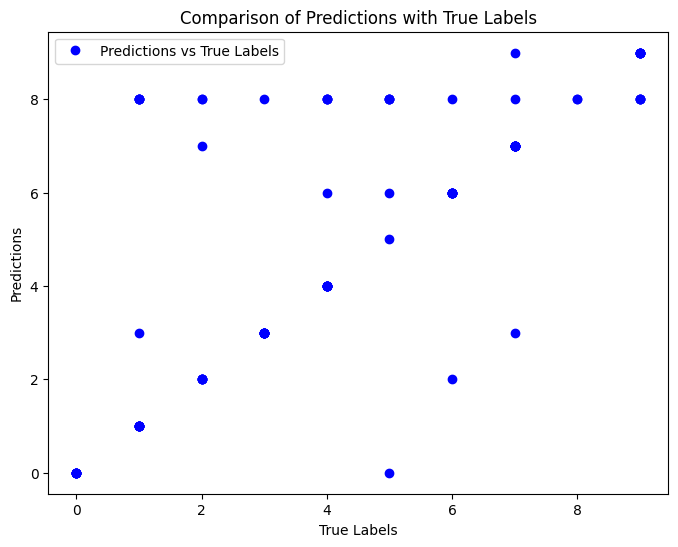

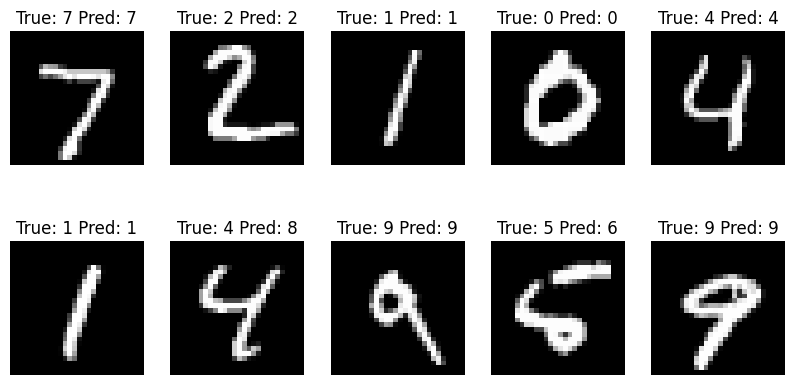

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       980
           1       0.99      0.61      0.76      1135
           2       0.97      0.58      0.73      1032
           3       0.81      0.84      0.83      1010
           4       0.98      0.64      0.78       982
           5       0.99      0.28      0.44       892
           6       0.96      0.85      0.90       958
           7       0.99      0.64      0.78      1028
           8       0.32      0.99      0.48       974
           9       0.73      0.78      0.76      1009

    accuracy                           0.72     10000
   macro avg       0.86      0.72      0.74     10000
weighted avg       0.86      0.72      0.74     10000



In [ ]:
# Analyze first model
model_analysis(model0_path)

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


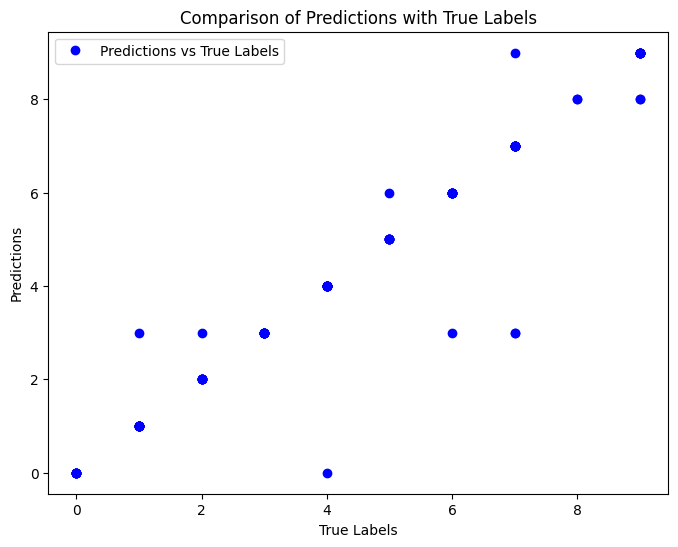

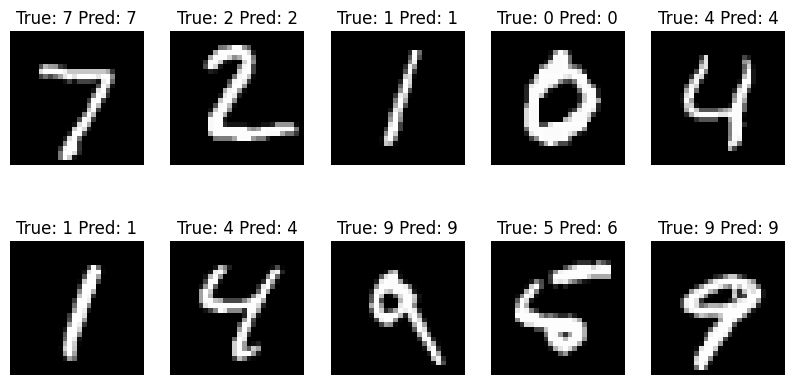

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.98      0.95      0.97      1135
           2       0.94      0.91      0.92      1032
           3       0.74      0.99      0.85      1010
           4       0.98      0.88      0.93       982
           5       0.98      0.85      0.91       892
           6       0.95      0.95      0.95       958
           7       0.99      0.74      0.85      1028
           8       0.82      0.96      0.88       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



In [ ]:
# Analyze mid model
model_analysis(model4_path)

MNISTModelMLP(
  (train_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Train/
  )
  (val_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Validation/
  )
  (test_metrics): MetricCollection(
    (MulticlassAccuracy): MulticlassAccuracy()
    (MulticlassPrecision): MulticlassPrecision()
    (MulticlassRecall): MulticlassRecall()
    (MulticlassF1Score): MulticlassF1Score(),
    prefix=Test/
  )
  (cm): MulticlassConfusionMatrix()
  (criterion): CrossEntropyLoss()
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)


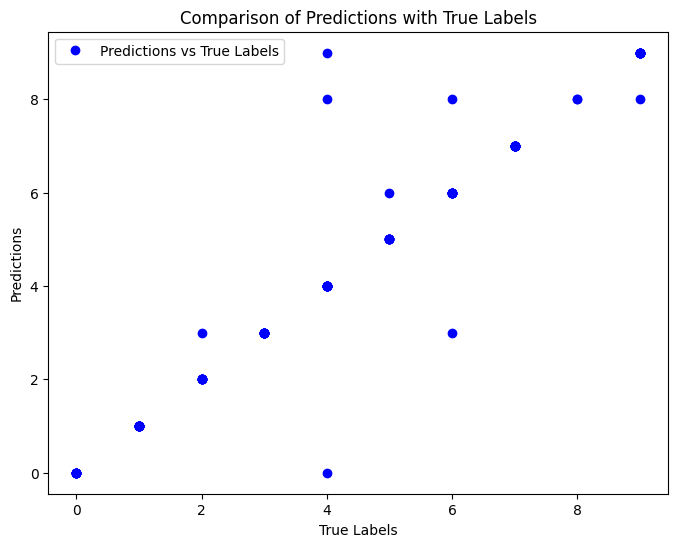

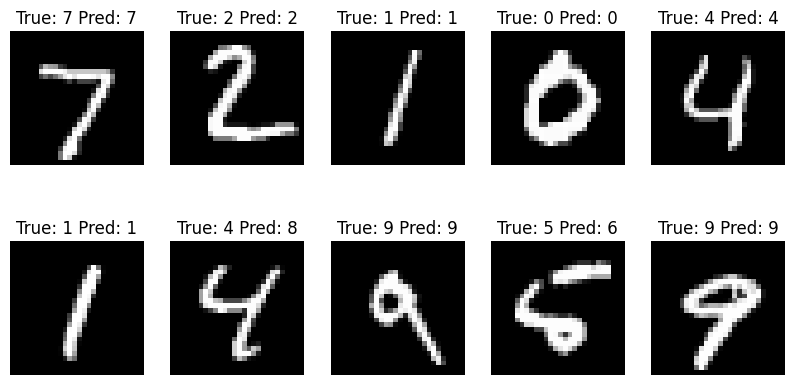

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       980
           1       0.97      0.97      0.97      1135
           2       0.97      0.90      0.93      1032
           3       0.83      0.98      0.90      1010
           4       0.99      0.82      0.90       982
           5       0.98      0.85      0.91       892
           6       0.97      0.93      0.95       958
           7       0.96      0.91      0.93      1028
           8       0.83      0.95      0.89       974
           9       0.92      0.86      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.93      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



In [ ]:
# Analyze last model
model_analysis(model9_path)